# Car Evaluation Project
Problem Statement:
Car Evaluation Project

Abstract: Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.

Data Set Information:

Car Evaluation Database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX, M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.). The model evaluates cars according to the following concept structure:

CAR car acceptability
PRICE overall price
buying buying price
maint price of the maintenance
TECH technical characteristics
COMFORT comfort
doors number of doors
persons capacity in terms of persons to carry
lug_boot the size of luggage boot
safety estimated safety of the car

Input attributes are printed in lowercase. Besides the target concept (CAR), the model includes three intermediate concepts: PRICE, TECH, COMFORT. Every concept is in the original model related to its lower level descendants by a set of examples. 

The Car Evaluation Database contains examples with the structural information removed, i.e., directly relates CAR to the six input attributes: buying, maint, doors, persons, lug_boot, safety.

Because of known underlying concept structure, this database may be particularly useful for testing constructive induction and structure discovery methods.


Attribute Information:

Class Values (Target):
unacc, acc, good, vgood

Attributes:
buying: vhigh, high, med, low.
maint: vhigh, high, med, low.
doors: 2, 3, 4, 5more.
persons: 2, 4, more.
lug_boot: small, med, big.
safety: low, med, high.

# Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv('car.csv')
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,med,unacc
1,1,vhigh,vhigh,2,2,small,high,unacc
2,2,vhigh,vhigh,2,2,med,low,unacc
3,3,vhigh,vhigh,2,2,med,med,unacc
4,4,vhigh,vhigh,2,2,med,high,unacc


Top 5 heads of the dataset.

In [3]:
df.tail()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
1722,1722,low,low,5more,more,med,med,good
1723,1723,low,low,5more,more,med,high,vgood
1724,1724,low,low,5more,more,big,low,unacc
1725,1725,low,low,5more,more,big,med,good
1726,1726,low,low,5more,more,big,high,vgood


Bottom  of the dataset.

# EDA

In [4]:
# checking shape
df.shape

(1727, 8)

1727 rows and 8 columns present in the dataset.

In [5]:
# checking data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1727 non-null   int64 
 1   buying      1727 non-null   object
 2   maint       1727 non-null   object
 3   doors       1727 non-null   object
 4   persons     1727 non-null   object
 5   lug_boot    1727 non-null   object
 6   safety      1727 non-null   object
 7   class       1727 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


1 integer datatype and 7 object data type present in the dataset.

In [6]:
# checking null values
df.isnull().sum()

Unnamed: 0    0
buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
class         0
dtype: int64

Null values are not present in the dataset.

# Visualization of nominal data

In [7]:
df.columns

Index(['Unnamed: 0', 'buying', 'maint', 'doors', 'persons', 'lug_boot',
       'safety', 'class'],
      dtype='object')

low      432
med      432
high     432
vhigh    431
Name: buying, dtype: int64


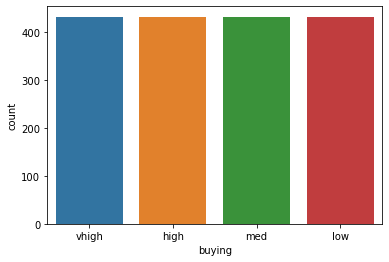

In [8]:
ax=sns.countplot(df['buying'])
print(df['buying'].value_counts())

buying column is looking normal with almost equal number of counts for all the unique values that is 432 except 'vhigh'(431).

low      432
med      432
high     432
vhigh    431
Name: maint, dtype: int64


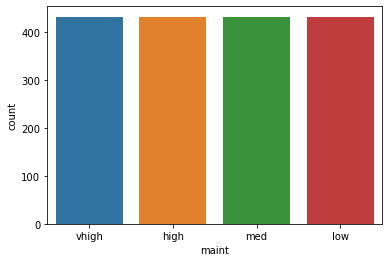

In [9]:
ax=sns.countplot(df['maint'])
print(df['maint'].value_counts())

maint column is looking normal with almost equal number of counts for all the unique values that is 432 except 'vhigh'(431).

5more    432
4        432
3        432
2        431
Name: doors, dtype: int64


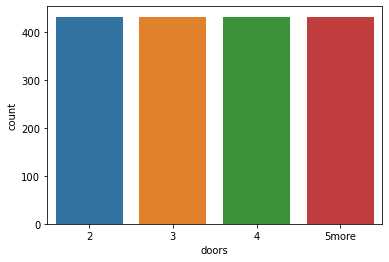

In [10]:
ax=sns.countplot(df['doors'])
print(df['doors'].value_counts())

doors column is looking normal with almost equal number of values.

more    576
4       576
2       575
Name: persons, dtype: int64


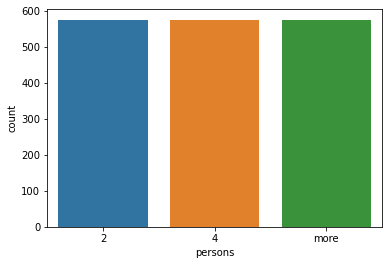

In [11]:
ax=sns.countplot(df['persons'])
print(df['persons'].value_counts())

perosns column is looking normal with almost equal number of values.

big      576
med      576
small    575
Name: lug_boot, dtype: int64


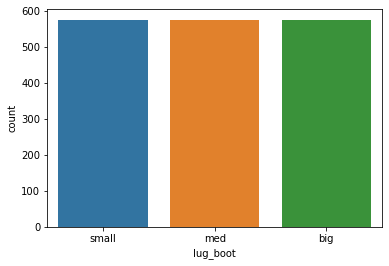

In [12]:
ax=sns.countplot(df['lug_boot'])
print(df['lug_boot'].value_counts())

3 unique values are present in lug_boot column with almost equal number of values.

med     576
high    576
low     575
Name: safety, dtype: int64


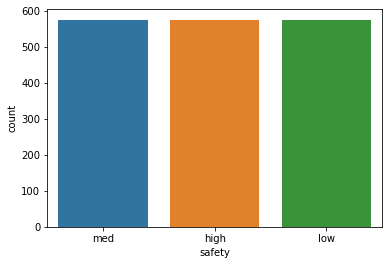

In [13]:
ax=sns.countplot(df['safety'])
print(df['safety'].value_counts())

3 unique values are present in safety column with almost equal number of values.

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


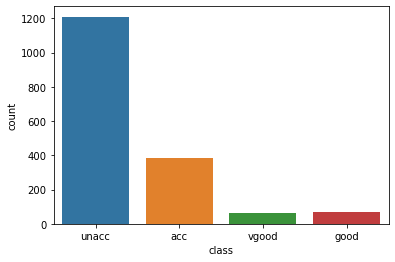

In [14]:
ax=sns.countplot(df['class'])
print(df['class'].value_counts())

class is our target column  and is showing very big difference in unique values counts.

# Ouliers and skewnss

ouliers and skewness can't be removed or treated in object data type column.

# Label Encoding for converting object column into numeric column.

In [16]:
from sklearn.preprocessing import LabelEncoder

In [18]:
enc=LabelEncoder()
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i])

In [19]:
df

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,3,3,0,0,2,2,2
1,1,3,3,0,0,2,0,2
2,2,3,3,0,0,1,1,2
3,3,3,3,0,0,1,2,2
4,4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...,...
1722,1722,1,1,3,2,1,2,1
1723,1723,1,1,3,2,1,0,3
1724,1724,1,1,3,2,0,1,2
1725,1725,1,1,3,2,0,2,1


Now we can see columns has been converted into numeric columns.

# Removing unnecessary columns

In [20]:
del df['Unnamed: 0']

In [21]:
df.shape

(1727, 7)

one column has been removed

# Checking Statistical summary

In [22]:
df.describe()

,buying,maint,doors,persons,lug_boot,safety,class
count,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.00000,1727.000000
mean,1.499131,1.499131,1.500869,1.000579,0.999421,1.00000,1.552982
std,1.118098,1.118098,1.118098,0.816615,0.816615,0.81697,0.876136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.500000,0.500000,1.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,2.000000
75%,2.000000,2.000000,2.500000,2.000000,2.000000,2.00000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.00000,3.000000


Number of count is same in all the columns.

Data is not deviated.

Not much difference between mean and median(%) in any of the column.

Not much difference between 75% and max in any of the column.

# Checking correlations

<AxesSubplot:>

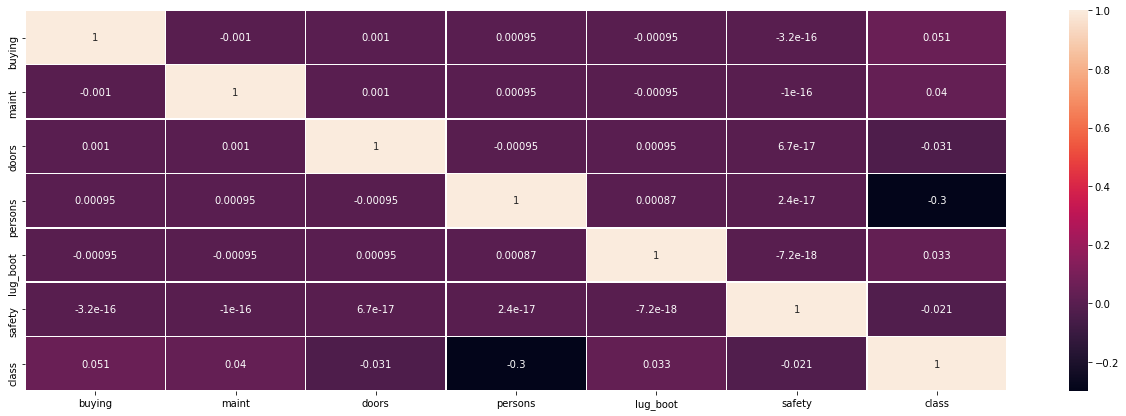

In [25]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(), annot=True, linewidths=.5)

persons column is negatively correlated with the target column class.

Most of the data are negatively correlated with each other.

# Splitting the datasets into x and y

In [26]:
x=df.drop('class',axis=1)
y=df['class']

In [27]:
x.shape

(1727, 6)

In [28]:
y.shape

(1727,)

# Train Test Split

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=.25, random_state=47)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1295, 6)
(432, 6)
(1295,)
(432,)


# HANDLING CLASS IMBALANCE PROBLEM BY OVERSAMPLING THE MINORITY CLASS

In [32]:
# In target column there is difference between the unique values
from imblearn.over_sampling import SMOTE
SM=SMOTE()

x_over,y_over=SM.fit_resample(x,y)

In [33]:
y_over.value_counts()

0    1209
1    1209
2    1209
3    1209
Name: class, dtype: int64

Now data is equal.

# Model Building

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [36]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred_y=lr.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.6689814814814815
[[ 18   0  83   8]
 [  1   0  14   0]
 [ 24   0 268   3]
 [  7   0   3   3]]
              precision    recall  f1-score   support

           0       0.36      0.17      0.23       109
           1       0.00      0.00      0.00        15
           2       0.73      0.91      0.81       295
           3       0.21      0.23      0.22        13

    accuracy                           0.67       432
   macro avg       0.33      0.33      0.31       432
weighted avg       0.59      0.67      0.62       432



In [37]:
# cross validation logistic regression
score=cross_val_score(lr,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.6491111669598727


Accuarcy score is 66.89% and cross validation score is 64.91%.

In [38]:
# random forest classifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.9675925925925926
[[103   2   4   0]
 [  1  14   0   0]
 [  6   0 289   0]
 [  1   0   0  12]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       109
           1       0.88      0.93      0.90        15
           2       0.99      0.98      0.98       295
           3       1.00      0.92      0.96        13

    accuracy                           0.97       432
   macro avg       0.95      0.95      0.95       432
weighted avg       0.97      0.97      0.97       432



In [41]:
# cross validation random forest classifier
score=cross_val_score(rf,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.7980179274524588


Accuarcy score is 96.75% and cv score is 79.80%.

In [45]:
# Decision tree classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_y=dt.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.9652777777777778
[[103   1   5   0]
 [  1  11   3   0]
 [  4   0 291   0]
 [  1   0   0  12]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       109
           1       0.92      0.73      0.81        15
           2       0.97      0.99      0.98       295
           3       1.00      0.92      0.96        13

    accuracy                           0.97       432
   macro avg       0.96      0.90      0.92       432
weighted avg       0.96      0.97      0.96       432



In [46]:
# cross validation decision tree classifier
score=cross_val_score(dt,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.7875864957694563


Accuracy score is 96.52% and cv score is 75.75%.

In [47]:
# adaboost classifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
pred_y=ad.predict(x_test)
print(accuracy_score(y_test,pred_y))
print(confusion_matrix(y_test,pred_y))
print(classification_report(y_test,pred_y))

0.75
[[ 58   0  36  15]
 [ 13   0   0   2]
 [ 42   0 253   0]
 [  0   0   0  13]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       109
           1       0.00      0.00      0.00        15
           2       0.88      0.86      0.87       295
           3       0.43      1.00      0.60        13

    accuracy                           0.75       432
   macro avg       0.46      0.60      0.50       432
weighted avg       0.74      0.75      0.74       432



In [48]:
# cross validation adaboost classifier
score=cross_val_score(ad,x,y,cv=5)
print('cv score',np.mean(score))

cv score 0.7024227192762


Accuarcy score is 75% and cv score is 70.24%.

So our models are predicting well and decision tree classifier is giving accuracy score 96.52% and cv score is 78.75% so we will take decision tree classifier in hyper parameter tuning. 

# Hyper Parameter Tuning

In [54]:
from sklearn import datasets
from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier(max_depth=6,random_state=0)

grid_param={'criterion':['ginny','entropy']}

gd_sr=GridSearchCV(estimator=dt,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.7725257602412666


# Final Model

In [55]:
final_model=DecisionTreeClassifier(criterion='entropy')
final_model.fit(x,y)
pred_y=final_model.predict(x_test)
acc=accuracy_score(y_test,pred_y)
print(acc*100)

100.0


So we are getting 100% accuracy score after hyper parameter tuning.

# saving the model

In [56]:
import pickle
filename='car_evaluation.pickle'
pickle.dump(rf,open(filename,'wb'))

# conclusion

In [57]:
loded_model=pickle.load(open('car_evaluation.pickle','rb'))
loded_model.fit(x_train,y_train)
result=loded_model.score(x_test,y_test)
print(result)

0.9699074074074074


With the help of MODEL , I learnt how to done EDA.

I also learnt ,making use of packages like matplotlib and seaborn to develop better insights of the data.

I have also learnt how to remove outliers and skewness to predict better accuracy.

I have also seen the impacts on the columns on target columns..

I came to know through the analysis ,which model will predict better accuracy.

This project helped me to gain deep knowledge , and also get to know where to use models.

​